In [2]:
from utils import *

## Simulated Training dataset

In [ ]:
X, y, mats = generateSimdata(loss=10, rand=2)

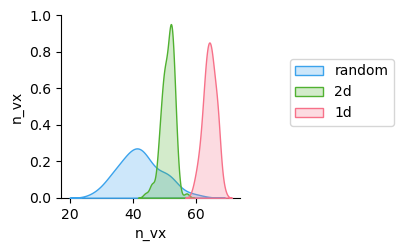

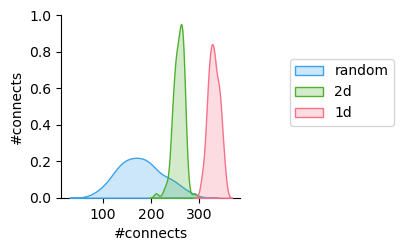

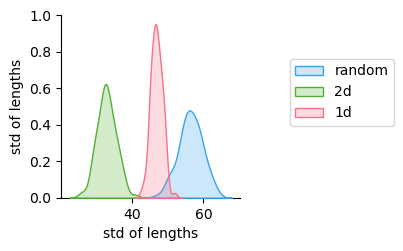

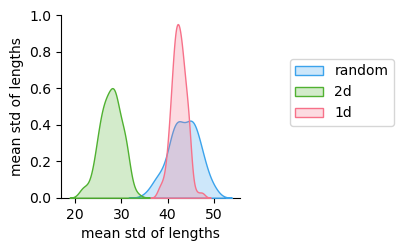

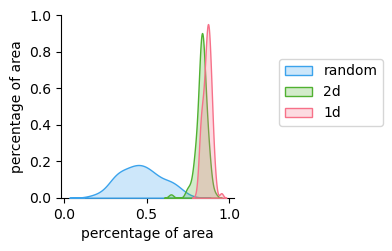

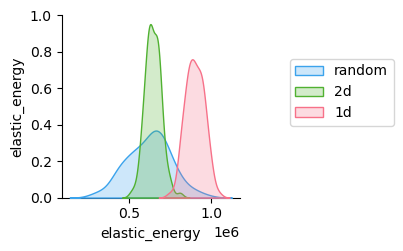

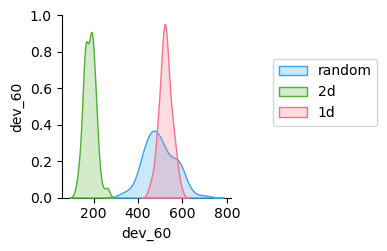

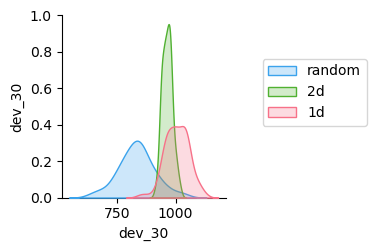

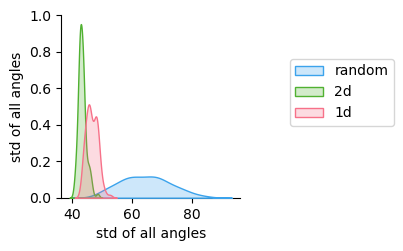

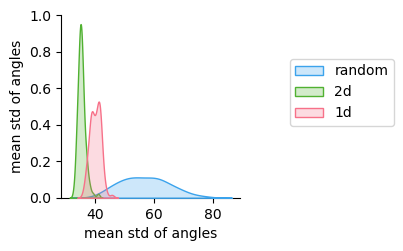

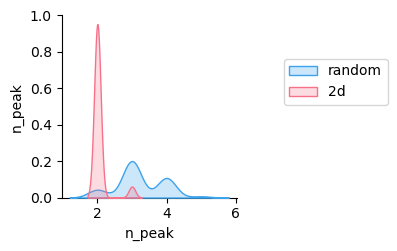

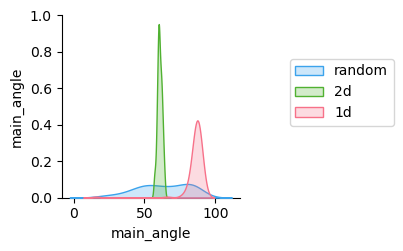

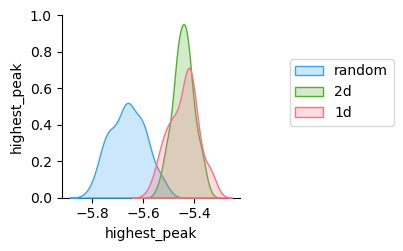

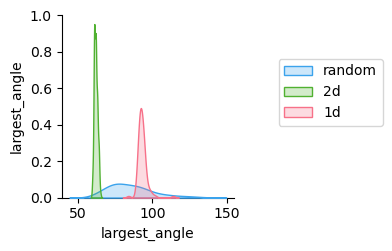

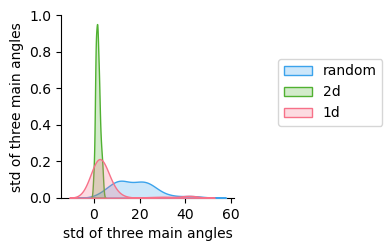

In [9]:
# rand=2
# loss=10
# thre=[50,280]
# n_samples=100

# t_r=0.15
# p_size=16
# stats_1d = []
# stats_2d = []
# stats_rand = []
# raw_data = []
# for i in range(n_samples):
#     vxs_1D = sim1D(size=int(2*64*16/p_size), spacex=int(100/p_size), spacey=int(187/p_size))
#     vxs_1D = jitter(vxs_1D,loss=np.random.randint(loss))
#     sim_1D = genPic(np.zeros([128,128]), vxs_1D, 5, theta=np.random.rand()*180, rand=rand, randz=3)
#     mat = sim_1D[32:32+64,32:32+64]
#     raw_data.append(mat)
#     vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
#     stats_1d.append(statsForVXS(vxs*p_size, thre=thre))

# for i in range(n_samples):
#     vxs_2D = sim2D(size=int(2*64*16/p_size), space=int(187/p_size/2))
#     vxs_2D = jitter(vxs_2D,loss=np.random.randint(loss))
#     sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=rand, randz=3)
#     mat = sim_2D[32:32+64,32:32+64]
#     raw_data.append(mat)
#     vxs = readVXSfromMat(sim_2D[32:32+64,32:32+64], min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
#     stats_2d.append(statsForVXS(vxs*p_size, thre=thre))

# for i in range(n_samples):
#     vxs_rand = simRand(size=int(2*64*16/p_size),n=4*np.random.randint(40,60))
#     sim_rand = genPic(np.zeros([128,128]), vxs_rand, 5, theta=np.random.rand()*180, rand=rand, randz=3)
#     mat = sim_rand[32:32+64,32:32+64]
#     raw_data.append(mat)
#     vxs = readVXSfromMat(sim_rand[32:32+64,32:32+64], min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
#     if len(vxs)>10:
#         stats_rand.append(statsForVXS(vxs*p_size, thre=thre))

tmp = []
for i, (stat, category) in enumerate(zip([stats_1d,stats_2d, stats_rand],[1,2,0])):
    df = pd.DataFrame(
            np.array(stat),
                columns=columns)
    df["conds"]=category
    tmp.append(df)
train_df = pd.concat(tmp)
train_np = train_df.to_numpy()
X_data = train_np[:,:-1]
y_data = train_np[:,-1]

tmp = []                   
for i, (stat, category) in enumerate(zip([stats_1d,stats_2d,stats_rand],["1d","2d","random"])):
    df = pd.DataFrame(np.array(stat),columns=columns)
    df["conds"]=category
    tmp.append(df)
test_df = pd.concat(tmp)
for i,col in enumerate(columns):
    ax = sns.pairplot(test_df[[col,'conds']], hue='conds',diag_kind='kde', palette='husl')
    ax._legend.remove()
    plt.legend(["random","2d","1d"], bbox_to_anchor=(1.9, 0.8))

In [7]:
columns = [         "n_vx",
                    "#connects",
                    "std of lengths",
                    "mean std of lengths",
                    "percentage of area",
                    "elastic_energy",
                    "dev_60",
                    "dev_30",
                    "std of all angles",
                    "mean std of angles",
                    "n_peak",
                    "main_angle",
                    "highest_peak", 
                    "largest_angle", 
                    "std of three main angles"]
tmp = []                   
for i, (stat, category) in enumerate(zip([stats_r1d,stats_r2d, stats_run],["1d","2d","un"])):
    df = pd.DataFrame(np.array(stat),columns=columns)
    df["conds"]=category
    tmp.append(df)
test_df = pd.concat(tmp)

NameError: name 'stats_r1d' is not defined

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\seaborn\axisgrid.py:1280: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


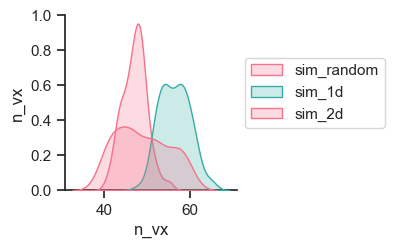

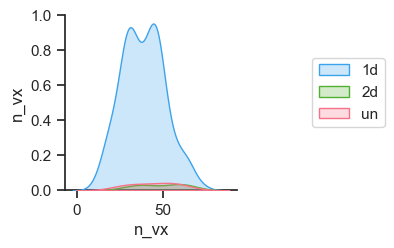

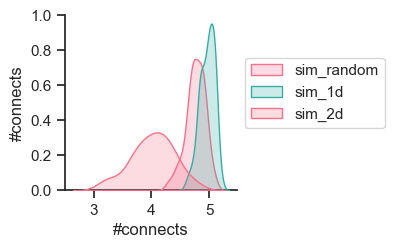

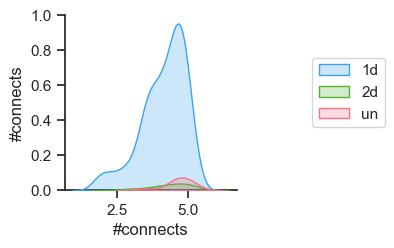

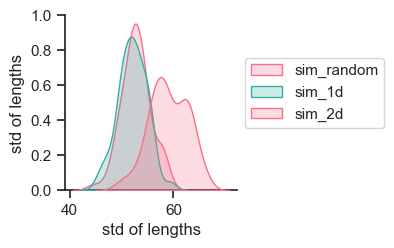

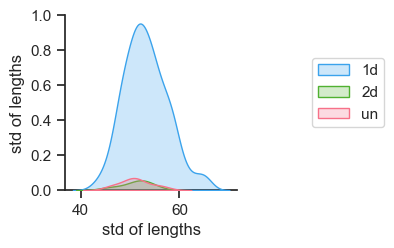

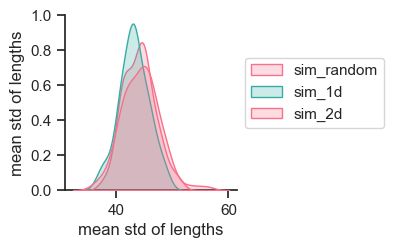

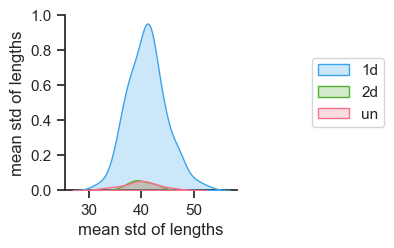

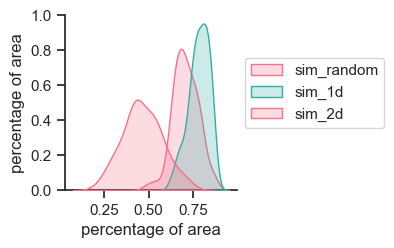

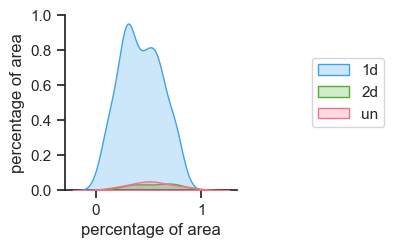

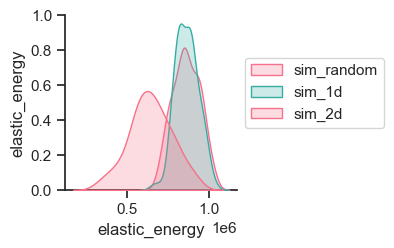

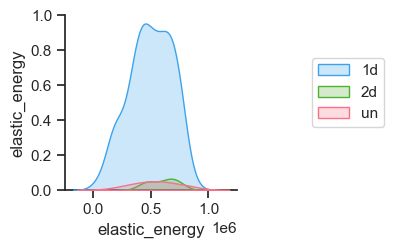

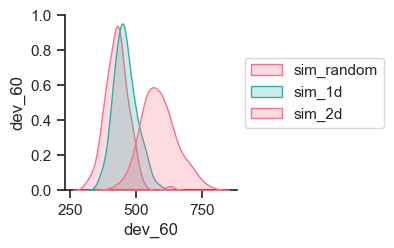

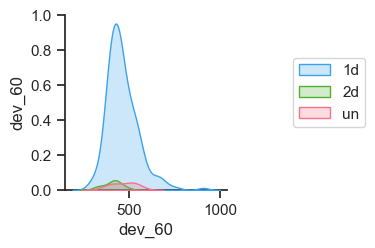

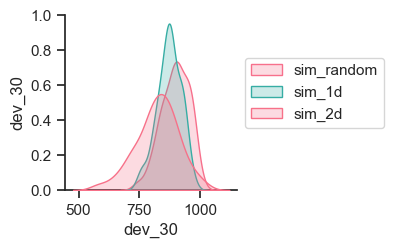

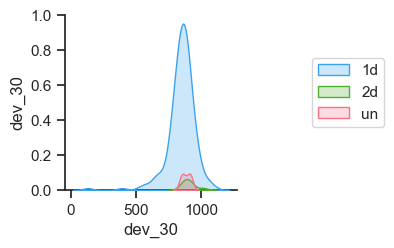

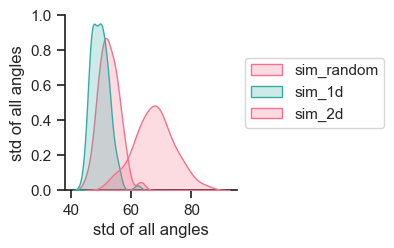

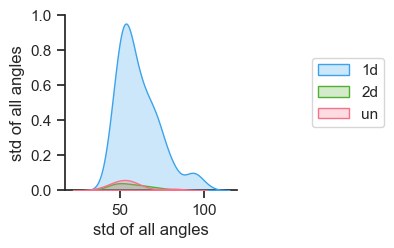

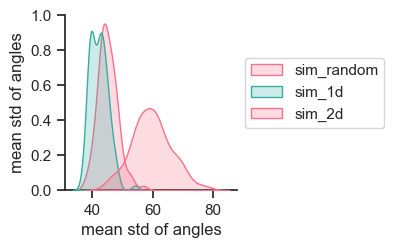

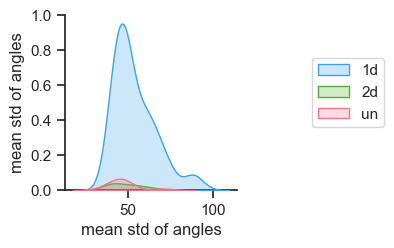

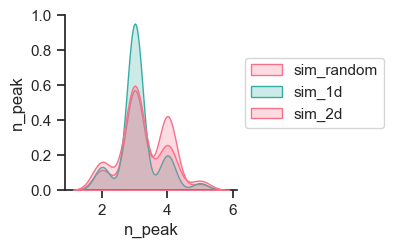

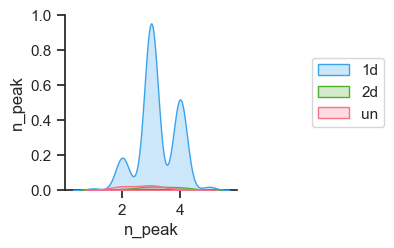

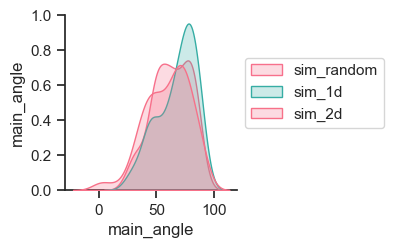

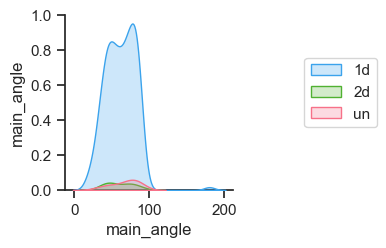

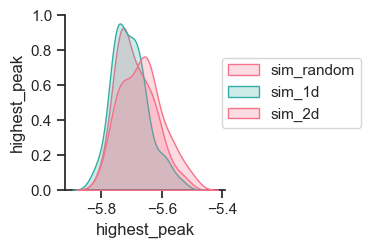

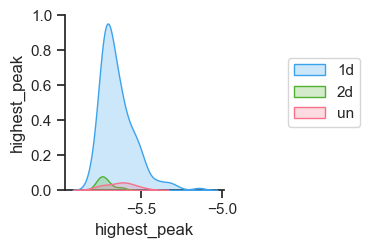

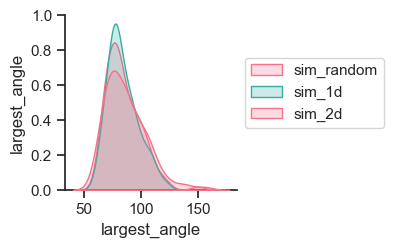

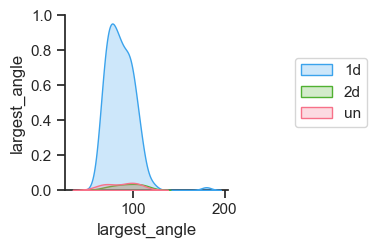

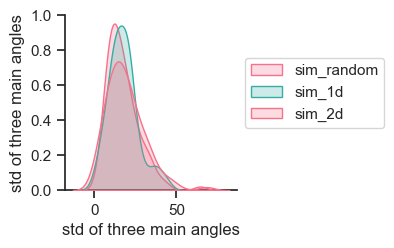

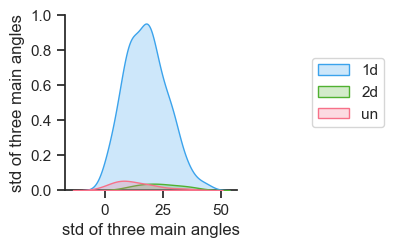

In [92]:
all_df = pd.concat([train_df, test_df])
for i,col in enumerate(columns):
    for j, (df,legends) in enumerate(zip([train_df, test_df],[["sim_random","sim_1d","sim_2d"],["un","1d","2d"]])):
        ax = sns.pairplot(df[[col,'conds']], hue='conds',diag_kind='kde', palette='husl')
        ax._legend.remove()
        plt.legend(legends, bbox_to_anchor=(1.9, 0.8))

## Get test data

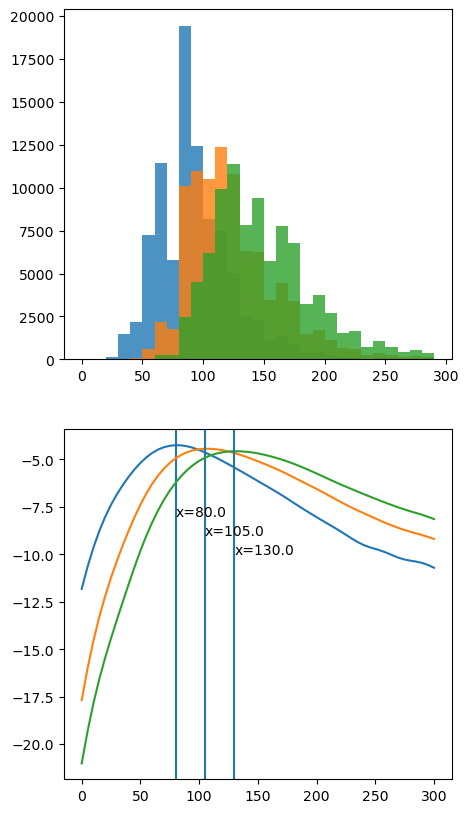

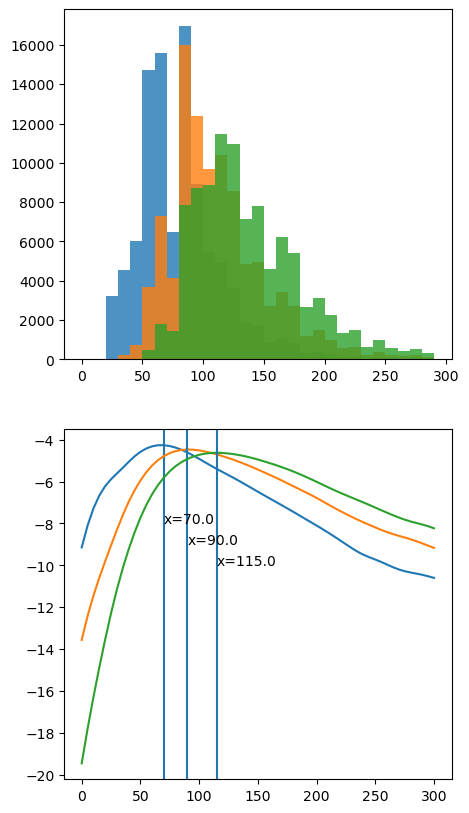

In [118]:
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
test_rand=glob.glob("../data/rendered/soma/Rand/*.npy")
a_1d=[]
a_2d=[]
a_un=[]
stats_2dr=[]
stats_randr=[]
thre=[50,280]
#devs=[]
#for test in [test_1d, test_2d, test_rand]:

for (min_s,max_s,t_r) in [[0.7,1.3,0.1],[0.5,1,0.15]]:
    plt.subplots(2,1,figsize=[5,10])
    test = test_rand
    tmp_devs = []
    dists=[[] for i in range(3)]
    for i in range(len(test)):
        vxs = 16*readVXSfromMat(np.load(test[i]), min_sigma=min_s, max_sigma=max_s,num_sigma=20, threshold_rel=t_r)[0]
        if len(vxs) < 10:
            continue
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    plt.subplot(2,1,1)
    for i in range(3):
        plt.hist(dists[i],bins=range(0,300,10),alpha=0.8)
        #links = generateLinks(vxs*16, thre=thre, plot=0)
        #angles = getAngle(vxs, links)
        #a.extend(angles)
        #tmp_devs.append(calAngleDev(angles))
    #devs.append(tmp_devs)
    plt.subplot(2,1,2)
    for i in range(3):
        a = np.array(dists[i]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(0,300,61)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = argrelextrema(e, np.greater)[0]
        plt.axvline(x=s[l_max[0]])
        plt.text(s[l_max[0]],-8-i,"x="+str(s[l_max[0]]))

In [116]:
thre=[50,280]
p_size=16
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
stats_r1d=[]
min_s, max_s, t_r = 0.7,1.3,0.1
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    stats_r1d.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
stats_r2d=[]
for i in range(8):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    stats_r2d.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

test_un=glob.glob("../data/rendered/soma/Rand/*.npy")
stats_run=[]
for i in range(1000):
    mat = np.load(test_un[i])
    vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    if len(vxs)>10:
        stats_run.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

Text(0.5, 1.0, 'Density Probability Distribution in Real Neuron Data')

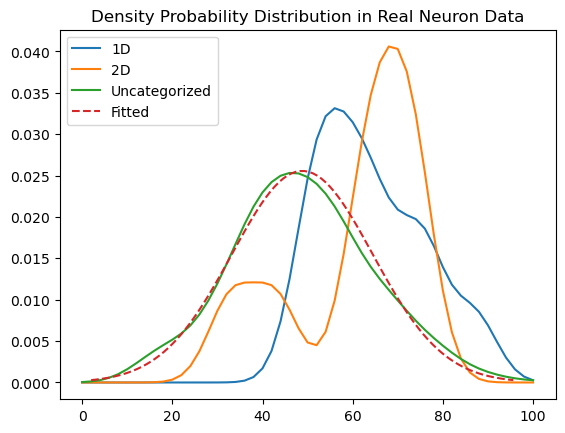

In [131]:
for i, stat in enumerate([stats_r1d,stats_r2d,stats_run]):
    a = np.array(stat)[:,0].reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(a)
    s = np.linspace(0,100,51)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    plt.plot(s, np.exp(e))
    l_max = argrelextrema(e, np.greater)[0]
    # for j in l_max:
    #     plt.axvline(x=s[j])
    #     plt.text(s[j],-8-i*10,"x="+str(int(s[j])))

(mu, sigma) = stats.norm.fit(np.array(stats_run)[:,0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),'--')

plt.legend(["1D","2D","Uncategorized","Fitted"])
plt.title("Density Probability Distribution in Real Neuron Data")


In [128]:
print(mu, sigma)

48.82032854209446 15.608123164609795


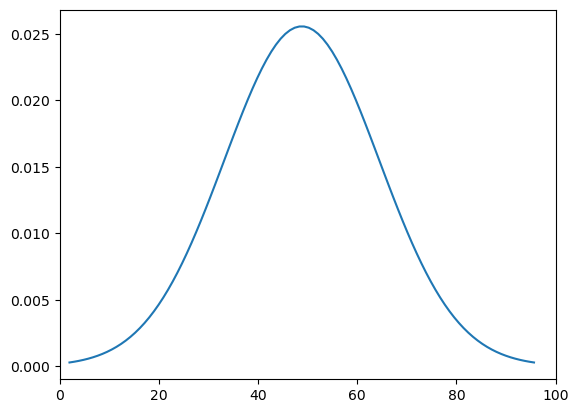

In [129]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlim([0,100])
plt.show()

Text(0.5, 1.0, 'Density Probability Distribution in Real Neuron Data')

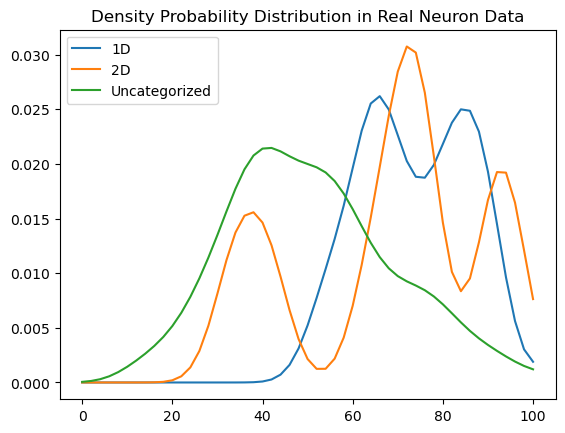

In [83]:
for i, stat in enumerate([stats_r1d,stats_r2d,stats_run]):
    a = np.array(stat)[:,0].reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(a)
    s = np.linspace(0,100,51)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    plt.plot(s, np.exp(e))
    l_max = argrelextrema(e, np.greater)[0]
    # for j in l_max:
    #     plt.axvline(x=s[j])
    #     plt.text(s[j],-8-i*10,"x="+str(int(s[j])))
plt.legend(["1D","2D","Uncategorized"])
plt.title("Density Probability Distribution in Real Neuron Data")

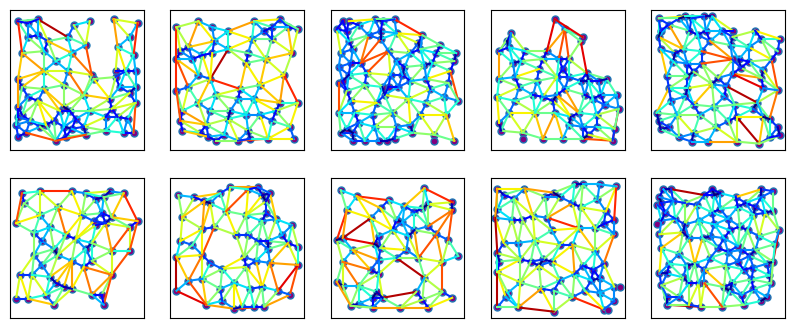

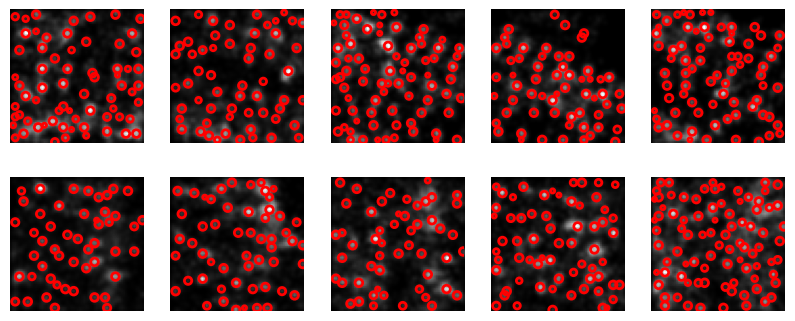

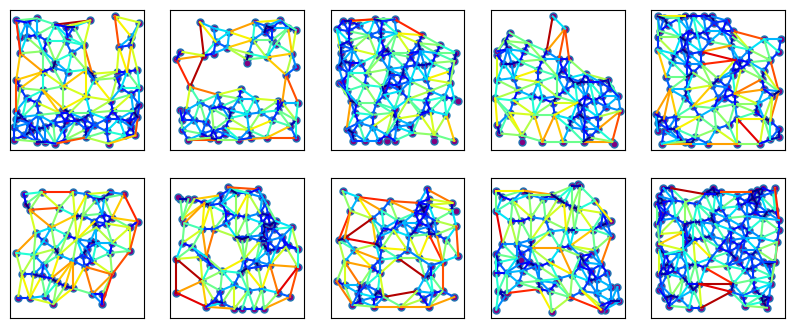

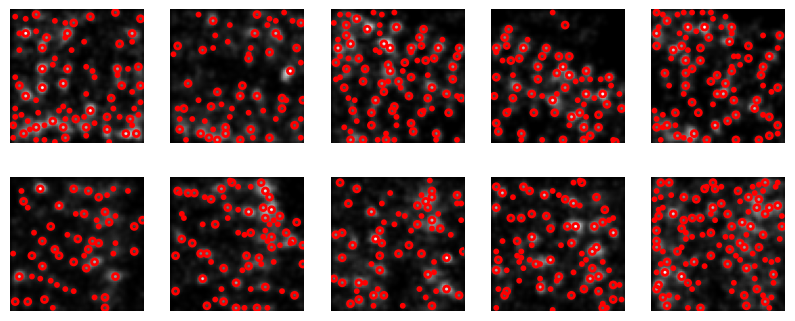

In [114]:
test=glob.glob("../data/rendered/soma/1D/*.npy")
for (min_s,max_s,t_r) in [[0.7,1.3,0.1],[0.5,1,0.15]]:
    plt.figure(figsize=(10,4))
    for i in range(10):
        plt.subplot(2,5,i+1)
        mat = np.load(test[i])
        vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        links = generateLinks(vxs*16, thre=thre, plot=0)
        visualize(vxs, links, thre=thre, p_size=16)
        plt.xticks([], [])
        plt.yticks([], [])
    plt.figure(figsize=(10,4))
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        mat = np.load(test[i])
        vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, ax=ax,threshold_rel=t_r,plot=1)[0]
        #plt.imshow(img,cmap="gray")
        plt.xticks([], [])
        plt.yticks([], [])

<Figure size 1000x400 with 0 Axes>

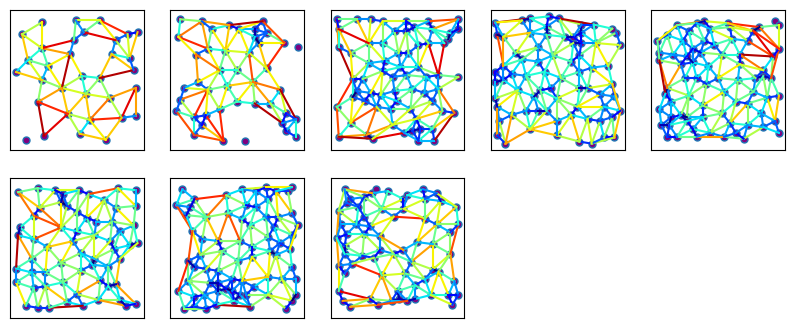

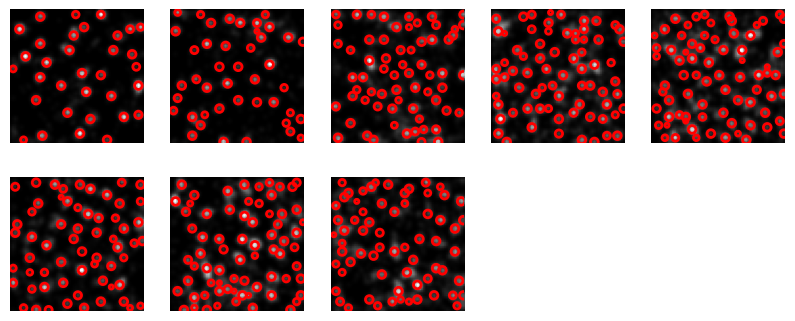

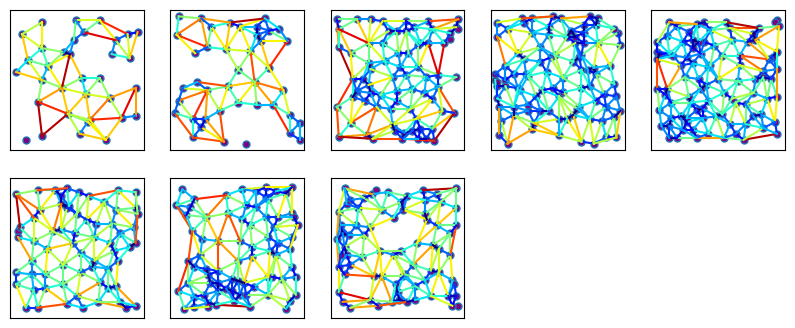

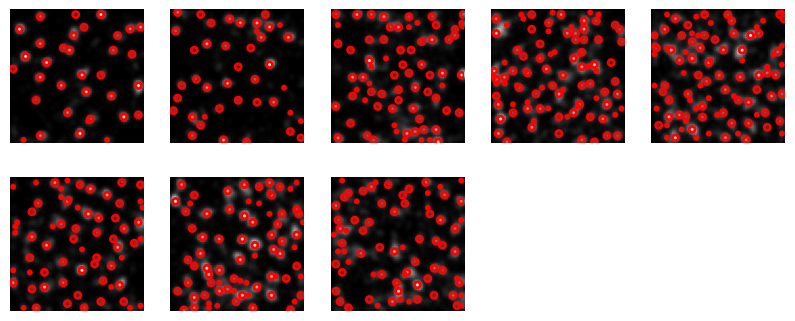

In [115]:
test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
plt.figure(figsize=(10,4))
t_r=0.1
for (min_s,max_s,t_r) in [[0.7,1.3,0.1],[0.5,1,0.15]]:
    plt.figure(figsize=(10,4))
    for i in range(8):
        plt.subplot(2,5,i+1)
        mat = np.load(test_2d[i])
        vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        links = generateLinks(vxs*16, thre=thre, plot=0)
        visualize(vxs, links, thre=thre, p_size=16)
        plt.xticks([], [])
        plt.yticks([], [])
    plt.figure(figsize=(10,4))
    for i in range(8):
        ax = plt.subplot(2,5,i+1)
        mat = np.load(test_2d[i])
        vxs = readVXSfromMat(mat,min_sigma=min_s,max_sigma=max_s,num_sigma=20, ax=ax,threshold_rel=t_r,plot=1)[0]
        #plt.imshow(img,cmap="gray")
        plt.xticks([], [])
        plt.yticks([], [])

In [63]:
np.array(stats_r2d)[:,0]

array([34., 41., 72., 92., 94., 65., 76., 73.])

In [65]:
np.array(stats_run)[:,0]

array([60., 47., 23., 33., 37., 47., 68., 42., 59., 55., 45., 59., 39.,
       29., 31., 41., 61., 53., 75., 35., 46., 38., 19., 57., 79., 41.,
       44., 40., 56., 59., 53., 65., 51., 42., 49., 40., 54., 62., 55.,
       59., 55., 63., 68., 67., 50., 48., 63., 36., 68., 53., 39., 59.,
       57., 59., 46., 56., 56., 29., 19., 72., 61., 58., 59., 35., 43.,
       32., 37., 50., 53., 43., 42., 49., 54., 29., 45., 33., 43., 41.,
       58., 54., 36., 60., 53., 16., 58., 47., 57., 44., 58., 56., 43.,
       45., 42., 36., 46., 48., 45., 51., 59., 51., 51., 36., 52., 36.,
       48., 33., 37., 36., 47., 77., 36., 25., 38., 31., 49., 78., 45.,
       40., 45., 42., 31., 54., 63., 68., 52., 31., 51., 53., 27., 48.,
       52., 53., 41., 55., 52., 56., 53., 55., 20., 30., 50., 52., 56.,
       75., 56., 54., 61., 43., 19., 58., 41., 48., 63., 47., 70., 52.,
       34., 27., 20., 58., 45., 51., 52., 52., 57., 48., 38., 53., 38.,
       47., 71., 59., 45., 49., 50., 50., 54., 45., 39., 50., 47

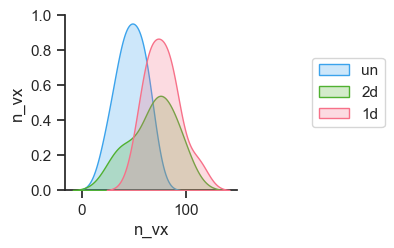

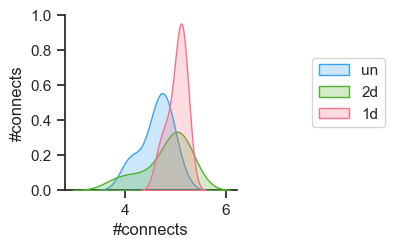

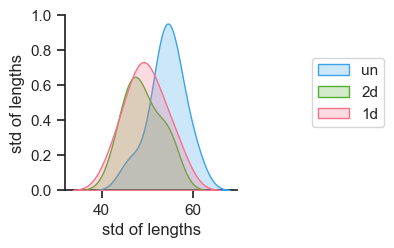

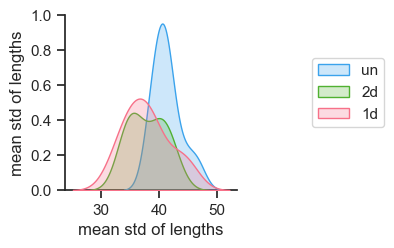

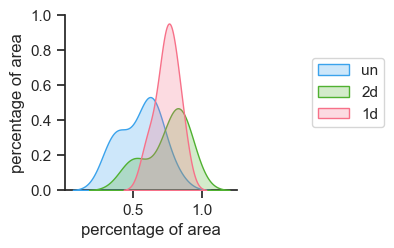

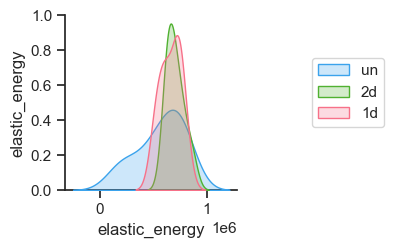

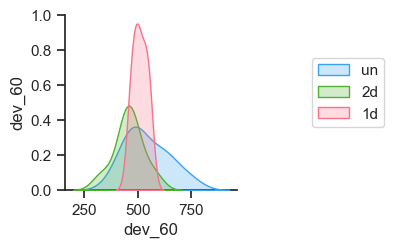

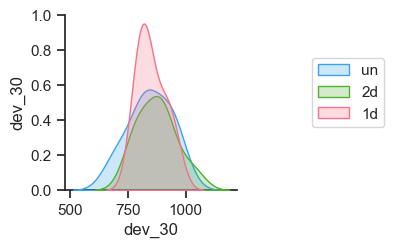

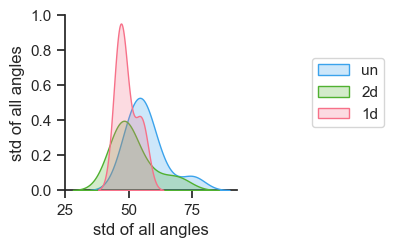

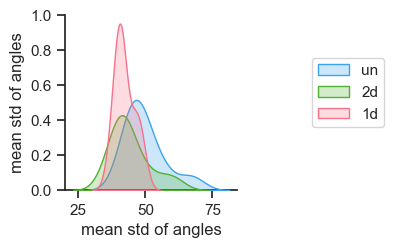

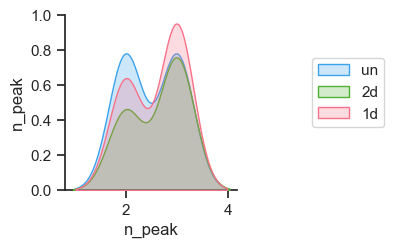

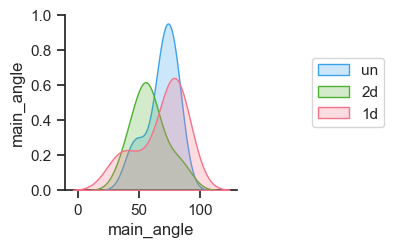

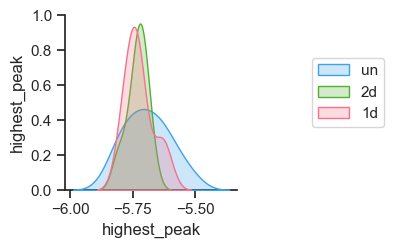

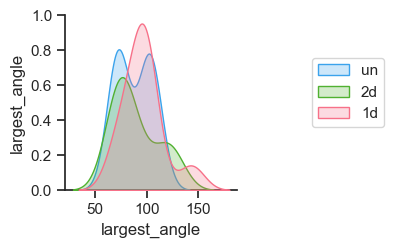

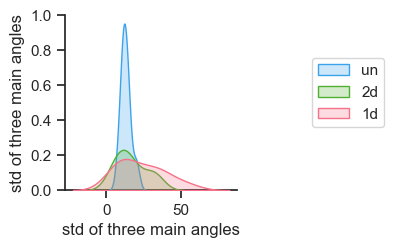

In [ ]:
# show test data stats
tmp = []                   
for i, (stat, category) in enumerate(zip([stats_r1d,stats_r2d,stats_run[:100]],["1d","2d","un"])):
    df = pd.DataFrame(np.array(stat),columns=columns)
    df["conds"]=category
    tmp.append(df)
test_df = pd.concat(tmp)
for i,col in enumerate(columns):
    ax = sns.pairplot(test_df[[col,'conds']], hue='conds',diag_kind='kde', palette='husl')
    ax._legend.remove()
    plt.legend(["un","2d","1d"], bbox_to_anchor=(1.9, 0.8))

## Random Forest Classification

In [103]:
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
tmp = []
clf = RandomForestClassifier(max_depth=5, random_state=0)
# default 100 trees, should be enough
clf.fit(X[:,-7:], y)
# print(clf.predict([[0, 0, 0, 0]]))
for test, cat in zip([stats_1d, stats_2d, stats_rand],[1,2,0]):
    tmp.append(np.mean([ 1 if x==cat else 0 for x in clf.predict(np.array(test)[:,-7:])]))

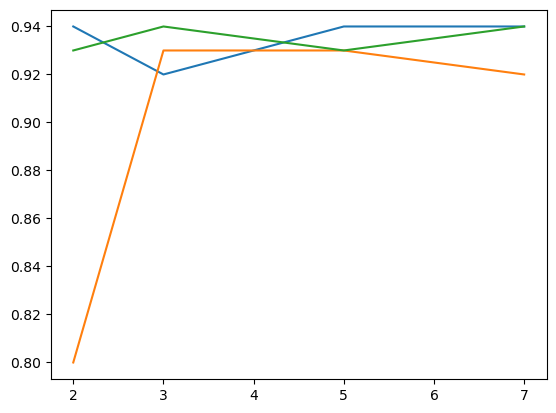

In [67]:
# Tree classifier depth, tried[2,3,5,7], so choose 5
plt.plot([2,3,5,7],np.reshape(tmp,[4,3]))

In [114]:
# Performance on training data
for test, cat in zip([stats_1d, stats_2d, stats_rand],[1,2,0]):
    print(np.mean([ 1 if x==cat else 0 for x in clf.predict(np.array(test)[:,-7:])]))

0.59
0.01
0.79


In [113]:
# Performance on real data
for test, cat in zip([stats_r1d, stats_r2d, stats_run],[1,2,0]):
    print(np.mean([ 1 if x==cat else 0 for x in clf.predict(np.array(test)[:,-7:])]))


0.7
0.125
0.34375


In [4]:
def getTrianglesFromList(link_list):
    if len(link_list) == 0:
        return []
    n_vx = np.max(sum(link_list, [])) + 1
    links = convertList2Matrix(link_list, n_vx)
    tri_list = []
    for link in link_list:
        for i in range(n_vx):
            if i in link:
                continue
            if links[i][link[0]] == 1 and links[i][link[1]] == 1:
                if (
                    [link[0], link[1], i] not in tri_list
                    and [link[1], link[0], i] not in tri_list
                    and [link[1], i, link[0]] not in tri_list
                    and [link[0], i, link[1]] not in tri_list
                ):
                    tri_list.append([i, link[0], link[1]])

    return tri_list

In [55]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def testAllClass(X, y, vxss=None, thre=[50,280], methods=[6,9], debug=0, n_debug=10):
    names = [
        "Nearest Neighbors",
        "Linear SVM",
        "RBF SVM",
        "Gaussian Process",
        "Decision Tree",
        "Random Forest",
        "Neural Net",
        "AdaBoost",
        "Naive Bayes",
        "QDA",
    ]

    classifiers = [
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=0.025, random_state=42),
        SVC(gamma=2, C=1, random_state=42),
        GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
        DecisionTreeClassifier(max_depth=5, random_state=42),
        RandomForestClassifier(
            max_depth=5, n_estimators=10, max_features=7, random_state=42
        ),
        MLPClassifier(alpha=1, max_iter=1000, random_state=42),
        AdaBoostClassifier(algorithm="SAMME", random_state=42),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
    ]

    # X = X_data
    # y = y_data
    X_train, X_test, y_train, y_test , idx_train, idx_test= train_test_split(
            np.nan_to_num(X), y, np.arange(len(y)), test_size=0.4, random_state=42
    )

    scores = np.zeros(len(methods))
    seperate_accuracy = np.zeros([len(methods),len(np.unique(y))])
    for i, (name, clf) in enumerate(zip([names[x] for x in methods], [classifiers[x] for x in methods])):
        # ax = plt.subplot(1, len(classifiers) + 1, i)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        scores[i]=clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        for j, label in enumerate(np.unique(y)):
            seperate_accuracy[i, j] = np.mean([ 1 if y_pred[k]==y_test[k] else 0 for k in range(len(y_test)) if y_test[k]==label ])
            if debug == 1:
                print("Accuracy for "+str(int(label)) +": "+"{:.2f}".format(seperate_accuracy[i,j]))
        if debug == 1:
            incorrect = [ k for k in range(len(y_test)) if y_test[k]!=y_pred[k] ]
            #plt.subplots(round(n_debug/5),5)
            n_y = round(n_debug/5)
            plt.figure(figsize = (10, 2*n_y))
            for ki, k in enumerate(np.random.choice(incorrect,min(len(incorrect),n_debug),False)):
                plt.subplot(n_y, 5, ki+1)
                vxs = vxss[idx_test[k]]
                links = generateLinks(vxs*16, thre=thre, plot=0)
                visualize(vxs,links,thre=thre,p_size=16)
                plt.xticks([], [])
                plt.yticks([], [])
                plt.title(str(int(y_test[k]))+" mis as "+str(int(y_pred[k])))
            plt.suptitle(name+" Error Examples:")
    return scores, seperate_accuracy, np.unique(y)

In [ ]:
for name, score in zip(names, scores):
    print(name+": "+"{:.2f}".format(score))



In [50]:
t_score

array([0.9, 0.9])

In [58]:
loss = 1
noise = 0
rand = 0
scores = []
loss = 40
#X, y, vxss = generateSimdata(loss=loss, rand=rand, noise=noise, n_samples=100)
tmp_scores = []

for features in [[1],[10,11,12,13,14],[x+1 for x in range(8)],[x+1 for x in range(14)]]:
    t_score, accuracy, lbls=testAllClass(X[:,features], y[:], vxss=vxss,debug=0,methods=[0,6])
scores.append(tmp_scores)

# plt.plot([1,5,10,20,30,40],np.array(scores)[:,:,0])
# plt.legend(["#Connections","Angle_based features","Other features","All features"])
# plt.xlabel("Loss")

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:974: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:974: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:977: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysi

Text(0.5, 0, 'Randomness')

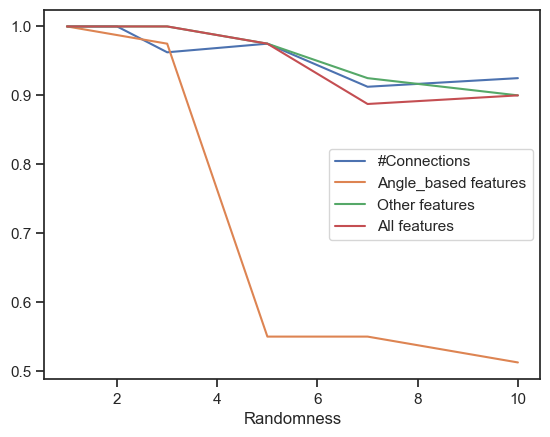

In [253]:
loss = 1
noise = 0
rand = 0
scores = []
for rand in [1,2,3,5,7,10]:
    X, y, mats = generateSimdata(loss=loss, rand=rand, noise=noise, n_samples=100)
    tmp_scores = []

    for features in [[1],[10,11,12,13,14],[x+1 for x in range(8)],[x+1 for x in range(14)]]:
        tmp_scores.append(testAllClass(X[:200,features], y[:200]))
    scores.append(tmp_scores)
plt.plot([1,2,3,5,7,10],np.array(scores)[:,:,0])
plt.legend(["#Connections","Angle_based features","Other features","All features"])
plt.xlabel("Randomness")

In [248]:
loss = 1
noise = 0
rand = 0
scores = []
for noise in [1,5,10,20,40]:
    tmp_score = []
    for repeat in range(5):
        X, y, mats = generateSimdata(loss=loss, rand=rand, noise=noise, n_samples=100)
        for features in [[1],[10,11,12,13,14],[x+1 for x in range(8)],[x+1 for x in range(14)]]:
            tmp_scores.append(testAllClass(X[:,features], y[:]))

    scores.append(np.mean(tmp_scores,axis=0))
plt.plot([1,5,10,20,40],np.array(scores)[:,:,0])
plt.legend(["#Connections","Angle_based features","Other features","All features"])
plt.xlabel("Noise")

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:974: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:974: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\sklearn\discriminant_analysis.py:977: RuntimeWarning: divide

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

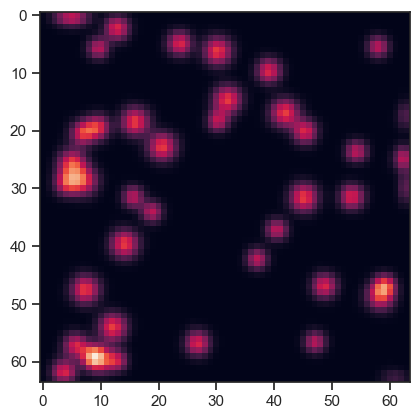

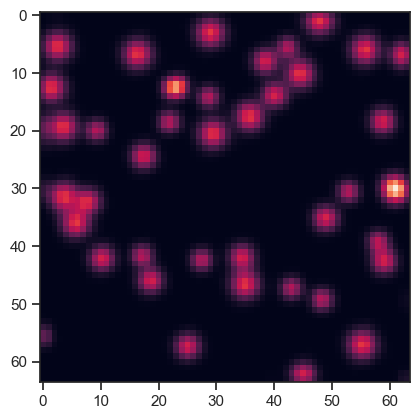

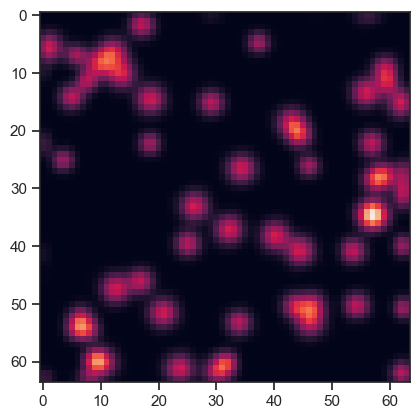

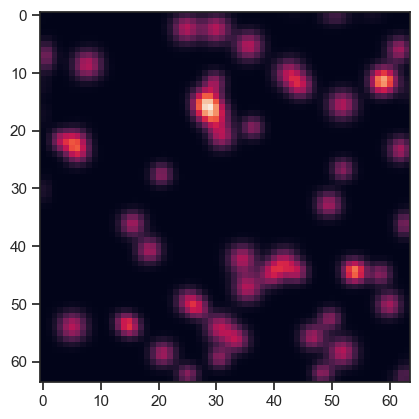

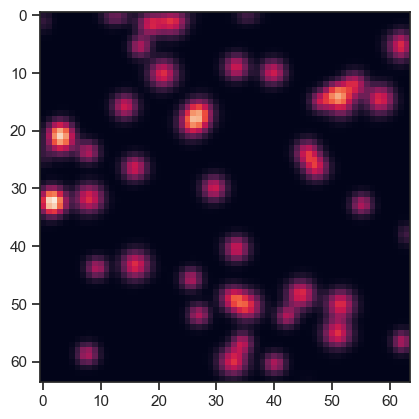

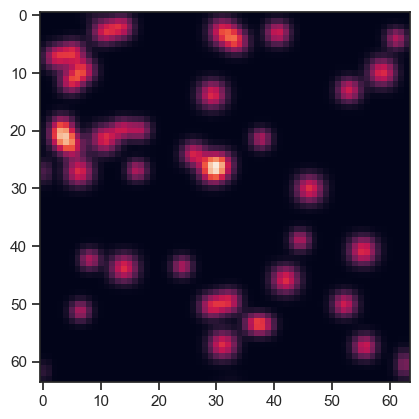

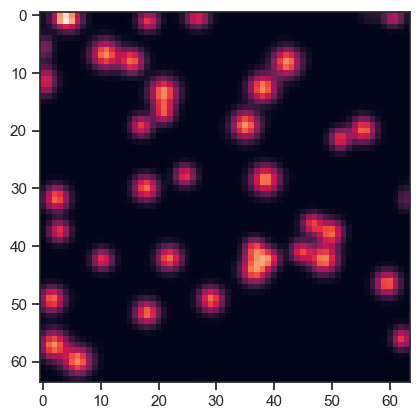

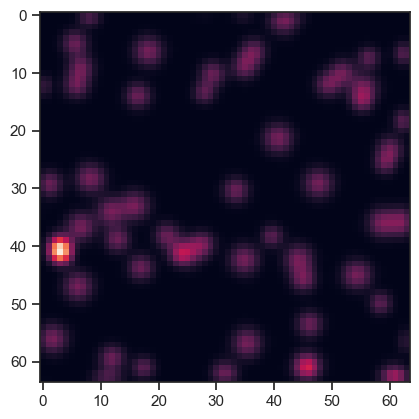

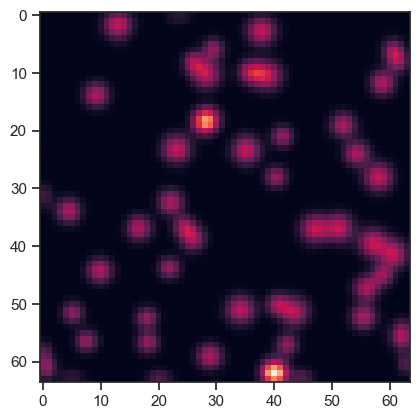

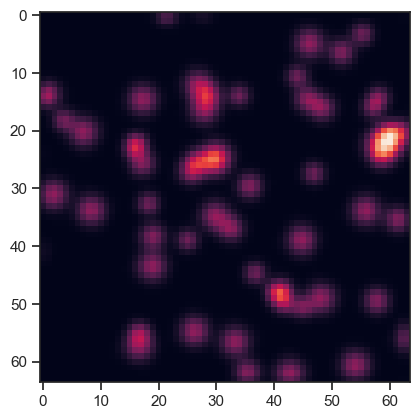

In [188]:
for mat in mats[-10:]:
    plt.figure()
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(mat, kernel, mode='same')
    plt.imshow(nimg)

Text(0, 0.5, 'Scores')

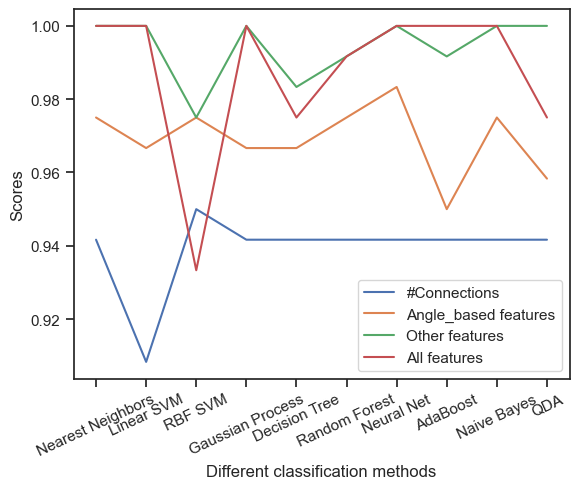

In [252]:
# scores = []
# loss=20
# rand=2
# noise=5
# X, y, mats = generateSimdata(loss=loss, rand=rand, noise=noise, n_samples=100)
# for features in [[1],[10,11,12,13,14],[2,3,4,5,6,7,8,9],[x+1 for x in range(14)]]:
#     scores.append(testAllClass(X[:,features], y[:],methods=[x for x in range(10)]))
plt.plot(np.array(scores).T)
plt.legend(["#Connections","Angle_based features","Other features","All features"])
plt.xlabel("Different classification methods")
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
plt.xticks([x for x in range(10)],names,rotation=25)
plt.ylabel("Scores")

## feature investigation

In [145]:
def generateSimdata(loss=10, rand=2, noise=0, n_samples=100):
    t_r=0.15
    p_size=16
    stats_1d = []
    stats_2d = []
    stats_rand = []
    stats_rand2 = []
    raw_data = []
    for i in range(n_samples):
        vxs_1D = sim1D(size=int(2*64*16/p_size), spacex=int(100/p_size), spacey=int(187/p_size))
        vxs_1D = jitter(vxs_1D,loss=np.random.randint(loss),noise=noise)
        sim_1D = genPic(np.zeros([128,128]), vxs_1D, 5, theta=np.random.rand()*180, rand=rand, randz=3)
        mat = sim_1D[32:32+64,32:32+64]
        vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        raw_data.append(vxs)     
        stats_1d.append(statsForVXS(vxs*p_size, thre=thre))

    for i in range(n_samples):
        vxs_2D = sim2D(size=int(2*64*16/p_size), space=int(187/p_size/2))
        vxs_2D = jitter(vxs_2D,loss=np.random.randint(loss),noise=noise)
        sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=rand, randz=3)
        mat = sim_2D[32:32+64,32:32+64]
        vxs = readVXSfromMat(sim_2D[32:32+64,32:32+64], min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        raw_data.append(vxs)
        stats_2d.append(statsForVXS(vxs*p_size, thre=thre))

    for i in range(n_samples):
        vxs_rand = simRand(size=int(2*64*16/p_size),n=4*int(np.random.normal(48.8,15.6)))
        sim_rand = genPic(np.zeros([128,128]), vxs_rand, 5, theta=np.random.rand()*180, rand=rand, randz=3)
        mat = sim_rand[32:32+64,32:32+64]
        # raw_data.append(mat)
        vxs = readVXSfromMat(sim_rand[32:32+64,32:32+64], min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
        if len(vxs)>10:
            stats_rand.append(statsForVXS(vxs*p_size, thre=thre))
            raw_data.append(vxs)

    for i in range(n_samples):
        vxs_randD = simRandD(size=64*16, d=65, n=int(np.random.normal(48.8,15.6)))
        if len(vxs_randD) > 10:
            vxs = jitter(vxs_randD, rand=rand*16, loss=np.min([len(vxs_randD)-2,np.random.randint(loss)]), noise=np.random.randint(10))
            if len(vxs) > 10:
                raw_data.append(vxs)
                stats_rand2.append(statsForVXS(vxs, thre=thre))
        
    tmp = []
    for i, (stat, category) in enumerate(zip([stats_1d,stats_2d, stats_rand, stats_rand2],[1,2,0,3])):
        df = pd.DataFrame(
                np.array(stat),
                    columns=columns)
        df["conds"]=category
        tmp.append(df)
    train_df = pd.concat(tmp)
    train_np = train_df.to_numpy()
    X_data = train_np[:,:-1]
    y_data = train_np[:,-1]
    return X_data,y_data, raw_data

In [144]:
train_df, y, vxss = generateSimdata(loss=20, noise=10, rand=2)

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KernelDensity.

In [13]:
corr_matrix = train_df.corr()
#plt.imshow(corr_matrix)
corr_matrix.style.background_gradient(cmap='coolwarm')